In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
tqdm.pandas()

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))

Num GPUs Available:  0
Num CPUs Available:  1


In [3]:
trainf_DF=pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
val_DF=pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')

In [4]:
trainf_DF.info

<bound method DataFrame.info of        2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just rea

In [5]:
val_DF.info

<bound method DataFrame.info of        2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just rea

In [6]:
trainf_DF.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
trainf_DF.shape

(74681, 4)

In [8]:
val_DF.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
val_DF.shape

(74681, 4)

In [10]:
#df=pd.concat([trainf_DF,val_DF])
df=trainf_DF

In [11]:
df.info

<bound method DataFrame.info of        2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just rea

In [12]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [13]:
df = df.drop(columns=df.columns[:2])

In [14]:
df.head()

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [15]:
df = df[[df.columns[1], df.columns[0]]]

In [16]:
df.head()

,"im getting on borderlands and i will murder you all ,",Positive
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [17]:
df.shape

(74681, 2)

In [18]:
df = df.rename(columns={df.columns[0]: 'Sentiment', df.columns[1]: 'Analysis'})

In [19]:
df.head()

,Sentiment,Analysis
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [20]:
df.dtypes

Sentiment    object
Analysis     object
dtype: object

In [21]:
df.dropna(inplace=True)

In [22]:
df = df.astype(str)
df['Sentiment'] = df['Sentiment'].apply(str)
df['Analysis'] = df['Analysis'].apply(str)
df.dtypes

Sentiment    object
Analysis     object
dtype: object

In [23]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub('', text)

In [24]:
df['Sentiment'] = df['Sentiment'].astype(str).progress_apply(lambda x: remove_html_tags(x))
df.head()

100%|██████████| 73995/73995 [00:00<00:00, 543307.81it/s]


,Sentiment,Analysis
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [25]:
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

df['Sentiment']=df['Sentiment'].astype(str).progress_apply(lambda x : remove_url(x))
df.head()

100%|██████████| 73995/73995 [00:00<00:00, 346418.67it/s]


,Sentiment,Analysis
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [26]:
import emoji

df['Sentiment'] = df['Sentiment'].astype(str).progress_apply(emoji.demojize)
df.head()

100%|██████████| 73995/73995 [00:07<00:00, 9554.00it/s] 


,Sentiment,Analysis
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [27]:
df.shape

(73995, 2)

In [28]:
def remove_digits(text):
    return re.sub(r'\d+', '', text)
df['Sentiment'] = df['Sentiment'].astype(str).progress_apply(lambda x: remove_digits(x))
df.head()

100%|██████████| 73995/73995 [00:00<00:00, 214491.88it/s]


,Sentiment,Analysis
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands and i will murder y...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [29]:
import string
exclude=string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

df['Sentiment']=df['Sentiment'].progress_apply(lambda x : remove_punc(x))
df.head()

100%|██████████| 73995/73995 [00:00<00:00, 164114.03it/s]


,Sentiment,Analysis
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you all,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands and i will murder y...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [31]:
# from textblob import TextBlob
# def check_spelling(text):
#     textblb=TextBlob(text)
#     return textblb.correct().string

# df['Sentiment']=df['Sentiment'].progress_apply(lambda x : check_spelling(x))
# df.head()

In [32]:
from nltk.corpus import stopwords
StopWords = stopwords.words("english")
StopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
def remove_stopwords(text):
    filtered_text = ' '.join(word for word in text.split() if word.lower() not in StopWords)
    return filtered_text

df['Sentiment']=df['Sentiment'].progress_apply(lambda x : remove_stopwords(x))
df.head()

100%|██████████| 73995/73995 [00:02<00:00, 24988.18it/s]


,Sentiment,Analysis
0,coming borders kill,Positive
1,im getting borderlands kill,Positive
2,im coming borderlands murder,Positive
3,im getting borderlands murder,Positive
4,im getting borderlands murder,Positive


In [34]:
# from nltk.stem import WordNetLemmatizer

# le=WordNetLemmatizer()
# def lemm_words(text):
#     return " ".join([le.lemmatize(word) for word in text.split()])
# df['Sentiment'] = df['Sentiment'].astype(str).progress_apply(lemm_words)

In [35]:
df.head()

,Sentiment,Analysis
0,coming borders kill,Positive
1,im getting borderlands kill,Positive
2,im coming borderlands murder,Positive
3,im getting borderlands murder,Positive
4,im getting borderlands murder,Positive


In [36]:
X = df.drop('Analysis',axis =1)
y = df['Analysis']

In [37]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((59196, 1), (14799, 1), (59196,), (14799,))

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vectorizer = CountVectorizer(
    lowercase=True,
    tokenizer=None,
    stop_words=None,
    max_features=10000,
    ngram_range=(1, 2),
    vocabulary=None,
    binary=False
)

In [42]:
X_tr = vectorizer.fit_transform(X_train['Sentiment'])
X_te = vectorizer.transform(X_test['Sentiment'])

In [43]:
vectorizer.vocabulary_

{'haha': 3941,
 'unk': 9237,
 'cant': 1123,
 'get': 3478,
 'another': 314,
 'overwatch': 6285,
 'conversation': 1607,
 'head': 4035,
 'wanna': 9501,
 'grind': 3868,
 'game': 3274,
 'badly': 594,
 'cant get': 1132,
 'get another': 3480,
 'think': 8813,
 'someday': 8164,
 'shall': 7896,
 'speak': 8223,
 'everyone': 2635,
 'say': 7702,
 'alone': 199,
 'truly': 9095,
 'cannot': 1119,
 'wait': 9478,
 'home': 4165,
 'depot': 1981,
 'drop': 2286,
 'car': 1160,
 'mulch': 5758,
 'cannot wait': 1121,
 'home depot': 4166,
 'og': 6116,
 'secret': 7787,
 'twitter': 9149,
 'person': 6503,
 'fuckin': 3207,
 'funny': 3253,
 'fanart': 2801,
 'always': 224,
 'beautiful': 677,
 'like': 5014,
 'zoe': 9992,
 'ghost': 3552,
 'recon': 7303,
 'breakpoint': 977,
 'download': 2252,
 'update': 9258,
 'ai': 158,
 'teams': 8689,
 'many': 5416,
 'ready': 7212,
 'ghost recon': 3553,
 'recon breakpoint': 7304,
 'game ready': 3361,
 'listen': 5106,
 'playapex': 6641,
 'got': 3773,
 'bug': 1027,
 'given': 3595,
 'ranke

In [44]:
vocab = vectorizer.get_feature_names_out()
vocab

array(['aa', 'aa aa', 'aaa', ..., 'zonestreamcx', 'zoom', 'zuckerberg'],
      dtype=object)

In [45]:
vocab.shape

(10000,)

In [46]:
X_train1 = pd.DataFrame(X_tr.toarray(), columns=vocab)
X_train1.head()

,aa,aa aa,aaa,aaron,ab,abandon,abandon sanction,abandoned,abc,abilities,...,zero dawn,zip,zoe,zombie,zombies,zombies back,zone,zonestreamcx,zoom,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
X_test1 = pd.DataFrame(X_te.toarray(), columns=vocab)
X_test1.head()

,aa,aa aa,aaa,aaron,ab,abandon,abandon sanction,abandoned,abc,abilities,...,zero dawn,zip,zoe,zombie,zombies,zombies back,zone,zonestreamcx,zoom,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
tfidf_vectorizer = TfidfVectorizer(
    lowercase=True,
    tokenizer=None,                             
    stop_words=StopWords,                          
    ngram_range=(1,2),                          
    max_features=10000,                
    vocabulary=None,                                
    binary=False)
X_train_matrix = tfidf_vectorizer.fit_transform(X_train['Sentiment'])
X_test_matrix = tfidf_vectorizer.transform(X_test['Sentiment'])

In [61]:
vocab = tfidf_vectorizer.get_feature_names_out()
vocab

array(['aa', 'aa aa', 'aaa', ..., 'zonestreamcx', 'zoom', 'zuckerberg'],
      dtype=object)

In [64]:
X_train2 = pd.DataFrame(X_train_matrix.toarray(), columns=vocab)
X_train2.head()

,aa,aa aa,aaa,aaron,ab,abandon,abandon sanction,abandoned,abc,abilities,...,zero dawn,zip,zoe,zombie,zombies,zombies back,zone,zonestreamcx,zoom,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.566535,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
X_test2 = pd.DataFrame(X_test_matrix.toarray(), columns=vocab)
X_test2.head()

,aa,aa aa,aaa,aaron,ab,abandon,abandon sanction,abandoned,abc,abilities,...,zero dawn,zip,zoe,zombie,zombies,zombies back,zone,zonestreamcx,zoom,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=44)
tree_classifier.fit(X_train1, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=44)

In [54]:
from sklearn.metrics import confusion_matrix
y_pred=tree_classifier.predict(X_test1)
bm = confusion_matrix(y_test, y_pred)
print(bm)

[[1913  194  149  319]
 [ 156 3663  224  429]
 [ 141  249 2838  393]
 [ 154  226  218 3533]]


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      2575
           1       0.85      0.82      0.83      4472
           2       0.83      0.78      0.81      3621
           3       0.76      0.86      0.80      4131

    accuracy                           0.81     14799
   macro avg       0.81      0.80      0.80     14799
weighted avg       0.81      0.81      0.81     14799



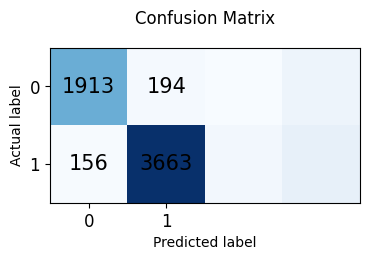

In [58]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred = tree_classifier.predict(X_test1)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cnf_matrix, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("0", "1"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("0", "1"))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', y=1.1)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cnf_matrix[i, j], ha="center", va="center", color="black", fontsize=15)
plt.show()

In [66]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier2 = DecisionTreeClassifier(criterion='entropy', random_state=44)
tree_classifier2.fit(X_train2, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=44)

In [67]:

y_pred2=tree_classifier2.predict(X_test2)

In [68]:
bm2 = confusion_matrix(y_test, y_pred2)
print(bm2)

[[1772  217  301  285]
 [ 175 3581  459  257]
 [ 158  310 2863  290]
 [ 181  262  472 3216]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      2575
           1       0.82      0.80      0.81      4472
           2       0.70      0.79      0.74      3621
           3       0.79      0.78      0.79      4131

    accuracy                           0.77     14799
   macro avg       0.77      0.76      0.77     14799
weighted avg       0.78      0.77      0.77     14799

